In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pwd

'/content'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import cx_Oracle
from matplotlib import font_manager,rc
font_path='./drive/MyDrive/L1/Notebooks/dataset/malgun.ttf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus']=False

In [4]:
# 개별 군집들의 평균 및 시각화 함수
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [5]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [6]:
df_origin=pd.read_pickle('./drive/MyDrive/L1/Notebooks/dataset/final_data_set.pkl')
df=df_origin.copy()
df.drop('spent_less_x',axis=1,inplace=True)
df

,CUSTNO,RECEIPTNO,PURCHDATE,PURCHTIME,AFFIL,CLASSCODEL,CLASSCODEM,CLASSCODES,STORENO,GENDER,AGEGROUP,RESIDENCE,PURCHAMOUNT,Year,AFFIL_CLASS,AFFIL_CLASS_2,cloth_cat,hobby_cat,14purchase,15purchase,spent_less
0,1,02857006,2014-10-05,17,A,5,0506,A050601,012,M,60세이상,060,342400,2014,A5,A0506,cloth_men,uncategorized,342400,0,0
1,1,02857007,2014-10-05,17,A,5,0506,A050601,012,M,60세이상,060,78000,2014,A5,A0506,cloth_men,uncategorized,78000,0,0
2,1,02857020,2014-10-05,17,A,5,0501,A050113,012,M,60세이상,060,500000,2014,A5,A0501,cloth_men,uncategorized,500000,0,0
3,1,02947490,2014-10-19,12,A,4,0402,A040222,012,M,60세이상,060,314640,2014,A4,A0402,cloth_casual,uncategorized,314640,0,0
4,1,02947512,2014-10-19,13,A,5,0503,A050306,012,M,60세이상,060,406980,2014,A5,A0503,cloth_etc,uncategorized,406980,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337918,19373,02844688,2014-10-03,20,A,4,0402,A040228,042,F,25세~29세,100,69000,2014,A4,A0402,cloth_casual,uncategorized,69000,0,0
337919,19373,05366898,2015-10-25,14,A,4,0402,A040217,010,F,25세~29세,100,29000,2015,A4,A0402,cloth_casual,uncategorized,0,29000,0
337920,19373,05242502,2015-10-04,15,A,4,0402,A040217,042,F,25세~29세,100,69900,2015,A4,A0402,cloth_casual,uncategorized,0,69900,0
337921,19375,07268767,2014-11-14,22,B,33,3304,B330403,016,F,25세~29세,049,12800,2014,B33,B3304,cloth_lingerie,uncategorized,12800,0,1


# 고객 성향 분석 2. 개인 선호에 의한 고객 성향 분류 

- 분류 기준

    - 유통 채널

    - 구매 시간
    
    - 경쟁사 이용 여부
    
    - 멤버십 가입 여부

    - 구매 빈도

### 구매 빈도, 구매 시간 칼럼 산출

In [7]:
# 구매 감소고객의 고객번호, 영수증 번호, 구매 시간 추출
edf=df[['CUSTNO','RECEIPTNO','PURCHTIME']][df.spent_less==1]
edf

,CUSTNO,RECEIPTNO,PURCHTIME
45,2,07587179,17
46,2,07587179,17
47,2,02931840,15
48,2,02723338,17
49,2,03163955,12
...,...,...,...
337865,19369,10441595,20
337866,19369,10441596,20
337867,19369,07228035,23
337921,19375,07268767,22


In [8]:
# 롯데 백화점 영업시간 1030 ~ 2000
# 롯데 마트 영업시간 오전 1000 ~ 2300
# 오전 (10 ~ 14) / 오후 (15 ~ 19) / 야간 (20 ~ 23) / 영업 외 (24, 0 ~ 9)
# 카테고리화 하니깐 영업시간 이외 시간대 사람들 다 없어짐 원래 많지도 않았지만
# 별 의미 없는 것 같아서 그냥 카테고리화 안하고 최빈값 산출
np.sort(edf.PURCHTIME.unique())

array([ 0,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23])

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


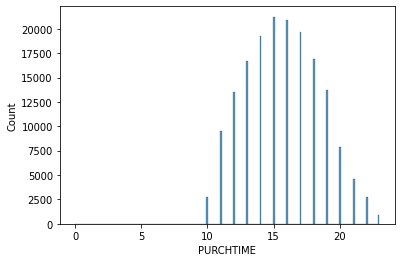

In [9]:
sns.histplot(edf.PURCHTIME)

In [10]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170140 entries, 45 to 337922
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   CUSTNO     170140 non-null  int64 
 1   RECEIPTNO  170140 non-null  object
 2   PURCHTIME  170140 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.2+ MB


In [11]:
aggregations={'RECEIPTNO':lambda x:len(x.unique()),
              'PURCHTIME':lambda x:x.mode()[0]}
edf_g=edf.groupby('CUSTNO').agg(aggregations)
edf_g

,RECEIPTNO,PURCHTIME
CUSTNO,,
2,38,13
6,39,14
7,30,17
11,14,13
16,5,13
...,...,...
19362,39,15
19363,2,11
19365,17,18


In [12]:
edf_g.PURCHTIME.value_counts()

15    1013
16     936
14     888
17     883
13     749
18     741
12     646
19     552
11     455
20     275
21     204
22     129
10     114
23      49
9        1
Name: PURCHTIME, dtype: int64

### 유통 채널 칼럼 (온라인 / 오프라인) 산출 후 삽입 

In [13]:
# 유통 채널 TABLE IMPORT
channel_grouped=pd.read_pickle('./drive/MyDrive/L1/Notebooks/dataset/channel_grouped.pkl')
channel_grouped

,CHANNEL,CUSNO,TOTAL_USE
0,A_MOBILE/APP,00007,4
1,A_MOBILE/APP,00014,1
2,A_MOBILE/APP,00074,1
3,A_MOBILE/APP,00112,16
4,A_MOBILE/APP,00122,27
...,...,...,...
8819,D_MOBILE/APP,19354,4
8820,D_MOBILE/APP,19355,1
8821,D_MOBILE/APP,19360,1
8822,D_MOBILE/APP,19377,5


In [14]:
# 오프라인 채널을 이용하는 고객들은 0
# 나머지 온라인 채널을 이용하는 고객들은 TOTAL_USE가 온라인 채널 이용 강도를 나타낸다 생각하여
# CHANNEL 구분 없이 그대로 TOTAL_USE를 CUSTNO 별로 삽입

mask=(channel_grouped['CHANNEL']=='A_MOBILE/APP') | (channel_grouped['CHANNEL']=='B_MOBILE/APP') |\
     (channel_grouped['CHANNEL']=='B_ONLINEMALL') 
channel_e=channel_grouped[mask][['CUSNO','TOTAL_USE']]
channel_e.rename({'CUSNO':'CUSTNO'},axis=1,inplace=True)
channel_e['CUSTNO']=channel_e['CUSTNO'].astype('int64')
channel_e

,CUSTNO,TOTAL_USE
0,7,4
1,14,1
2,74,1
3,112,16
4,122,27
...,...,...
7928,19055,3
7929,19101,2
7930,19118,1
7931,19139,9


In [15]:
edf_g.reset_index(inplace=True)
edf_merge=pd.merge(edf_g,channel_e,how='left',on='CUSTNO')
edf_merge['TOTAL_USE'].fillna(0,inplace=True)
edf_merge

,CUSTNO,RECEIPTNO,PURCHTIME,TOTAL_USE
0,2,38,13,0.0
1,6,39,14,0.0
2,7,30,17,4.0
3,11,14,13,0.0
4,16,5,13,0.0
...,...,...,...,...
8466,19362,39,15,0.0
8467,19363,2,11,0.0
8468,19365,17,18,0.0
8469,19369,15,17,0.0


In [16]:
edf_merge.TOTAL_USE.value_counts()

0.0      4800
1.0       534
2.0       346
3.0       250
4.0       182
         ... 
87.0        1
122.0       1
86.0        1
79.0        1
109.0       1
Name: TOTAL_USE, Length: 102, dtype: int64

### 경쟁사 이용 여부 삽입

In [17]:
# 경쟁사 이용여부 TABLE IMPORT
# 경쟁사 이용 여부를 0 (없음), 1(있음)으로 카테고리화

competitor_filtering=pd.read_pickle('./drive/MyDrive/L1/Notebooks/dataset/competitor_filtering.pkl')

aggregations={'COMPETITOR':'count',
              'USAGE_DATE':'mean'}
comp=competitor_filtering.groupby('CUSTNO').agg(aggregations)
comp.reset_index(inplace=True)
comp['BSJD']=1
comp.drop(['COMPETITOR','USAGE_DATE'],axis=1,inplace=True)
comp['CUSTNO']=comp['CUSTNO'].astype('int64')
comp

,CUSTNO,BSJD
0,1,1
1,2,1
2,4,1
3,7,1
4,8,1
...,...,...
5084,19370,1
5085,19372,1
5086,19375,1
5087,19376,1


In [18]:
edf_merge1=pd.merge(edf_merge,comp,how='left',on='CUSTNO')
edf_merge1.rename({'RECEIPTNO':'FREQUENCY','PURCHTIME':'TIME','TOTAL_USE':'CHANNEL','BSJD':'TRAITORS'},axis=1,inplace=True)
edf_merge1['TRAITORS'].fillna(0,inplace=True)
edf_merge1['CHANNEL']=edf_merge1['CHANNEL'].astype('int64')
edf_merge1['TRAITORS']=edf_merge1['TRAITORS'].astype('int64')
edf_merge1

,CUSTNO,FREQUENCY,TIME,CHANNEL,TRAITORS
0,2,38,13,0,1
1,6,39,14,0,0
2,7,30,17,4,1
3,11,14,13,0,1
4,16,5,13,0,1
...,...,...,...,...,...
8466,19362,39,15,0,1
8467,19363,2,11,0,1
8468,19365,17,18,0,0
8469,19369,15,17,0,0


In [19]:
competitor_filtering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19911 entries, 0 to 19910
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CUSTNO      19911 non-null  object
 1   COMPETITOR  19911 non-null  object
 2   USAGE_DATE  19911 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 466.8+ KB


### 멤버십 가입 여부 삽입

In [20]:
# 멤버십 가입 여부 TABLE IMPORT
mem_df=pd.read_pickle('./drive/MyDrive/L1/Notebooks/dataset/mmembership.pkl')
mem_df

,고객번호,멤버십명,가입년월
0,00011,하이마트,201512
1,00021,하이마트,201506
2,00037,하이마트,201306
3,00043,하이마트,201403
4,00044,하이마트,201411
...,...,...,...
7451,19377,롭스,201411
7452,19379,롭스,201412
7453,19380,롭스,201412
7454,19381,다둥이,201506


In [21]:
# 복수 멤버십 가입한 고객들 존재
len(mem_df['고객번호'].unique())

6498

In [22]:
aggregations={'멤버십명':'count','가입년월':'count'}
mem_g=mem_df.groupby('고객번호').agg(aggregations)
mem_g['MEMBERSHIP']=1
mem_g.drop(['멤버십명','가입년월'],axis=1,inplace=True)
mem_g.reset_index(inplace=True)
mem_g.rename({'고객번호':'CUSTNO'},axis=1,inplace=True)
mem_g['CUSTNO']=mem_g['CUSTNO'].astype('int64')
mem_g

,CUSTNO,MEMBERSHIP
0,11,1
1,21,1
2,37,1
3,43,1
4,44,1
...,...,...
6493,19377,1
6494,19379,1
6495,19380,1
6496,19381,1


In [23]:
edf_merge2=pd.merge(edf_merge1,mem_g,how='left',on='CUSTNO')
edf_merge2.fillna(0,inplace=True)
edf_merge2['MEMBERSHIP']=edf_merge2['MEMBERSHIP'].astype('int64')
edf_merge2

,CUSTNO,FREQUENCY,TIME,CHANNEL,TRAITORS,MEMBERSHIP
0,2,38,13,0,1,0
1,6,39,14,0,0,0
2,7,30,17,4,1,0
3,11,14,13,0,1,1
4,16,5,13,0,1,0
...,...,...,...,...,...,...
8466,19362,39,15,0,1,0
8467,19363,2,11,0,1,0
8468,19365,17,18,0,0,0
8469,19369,15,17,0,0,1


In [24]:
edf_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8471 entries, 0 to 8470
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   CUSTNO      8471 non-null   int64
 1   FREQUENCY   8471 non-null   int64
 2   TIME        8471 non-null   int64
 3   CHANNEL     8471 non-null   int64
 4   TRAITORS    8471 non-null   int64
 5   MEMBERSHIP  8471 non-null   int64
dtypes: int64(6)
memory usage: 463.3 KB


### Clustering

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


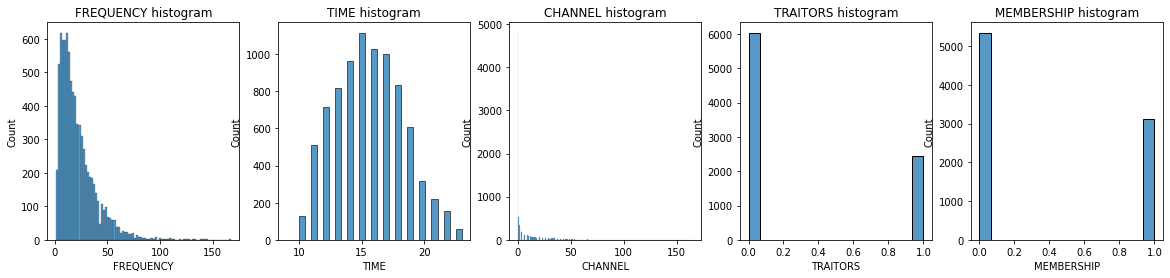

In [25]:
# 분포 확인
# 왜곡된 칼럼들 존재
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(figsize=(20,4),nrows=1,ncols=5)
ax1.set_title('FREQUENCY histogram')
sns.histplot(edf_merge2['FREQUENCY'],ax=ax1)
ax2.set_title('TIME histogram')
sns.histplot(edf_merge2['TIME'],ax=ax2)
ax3.set_title('CHANNEL histogram')
sns.histplot(edf_merge2['CHANNEL'],ax=ax3)
ax4.set_title('TRAITORS histogram')
sns.histplot(edf_merge2['TRAITORS'],ax=ax4)
ax5.set_title('MEMBERSHIP histogram')
sns.histplot(edf_merge2['MEMBERSHIP'],ax=ax5)

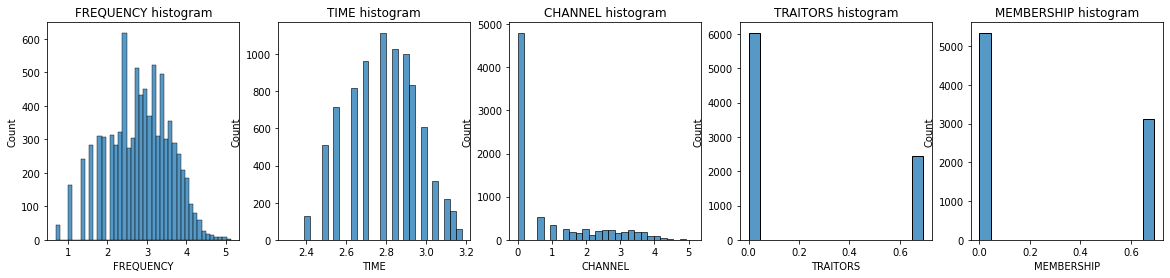

In [26]:
# 로그화
# 완전히는 아니지만 완화된 모습을 보임
features=edf_merge2[['FREQUENCY','TIME','CHANNEL','TRAITORS','MEMBERSHIP']]
f_log=np.log1p(features)
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(figsize=(20,4),nrows=1,ncols=5)
ax1.set_title('FREQUENCY histogram')
sns.histplot(f_log['FREQUENCY'],ax=ax1)
ax2.set_title('TIME histogram')
sns.histplot(f_log['TIME'],ax=ax2)
ax3.set_title('CHANNEL histogram')
sns.histplot(f_log['CHANNEL'],ax=ax3)
ax4.set_title('TRAITORS histogram')
sns.histplot(f_log['TRAITORS'],ax=ax4)
ax5.set_title('MEMBERSHIP histogram')
sns.histplot(f_log['MEMBERSHIP'],ax=ax5)

In [27]:
# 정규화
from sklearn.preprocessing import StandardScaler
f_scaled_array=StandardScaler().fit_transform(f_log)
f_scaled=pd.DataFrame(f_scaled_array,columns=f_log.columns)
f_scaled

,FREQUENCY,TIME,CHANNEL,TRAITORS,MEMBERSHIP
0,1.082834,-0.892141,-0.740075,1.575344,-0.764171
1,1.115667,-0.493738,-0.740075,-0.634782,-0.764171
2,0.785115,0.559085,0.487886,1.575344,-0.764171
3,-0.156301,-0.892141,-0.740075,1.575344,1.308608
4,-1.344573,-0.892141,-0.740075,1.575344,-0.764171
...,...,...,...,...,...
8466,1.115667,-0.121058,-0.740075,1.575344,-0.764171
8467,-2.243466,-1.782291,-0.740075,1.575344,-0.764171
8468,0.080139,0.871299,-0.740075,-0.634782,-0.764171
8469,-0.072605,0.559085,-0.740075,-0.634782,1.308608


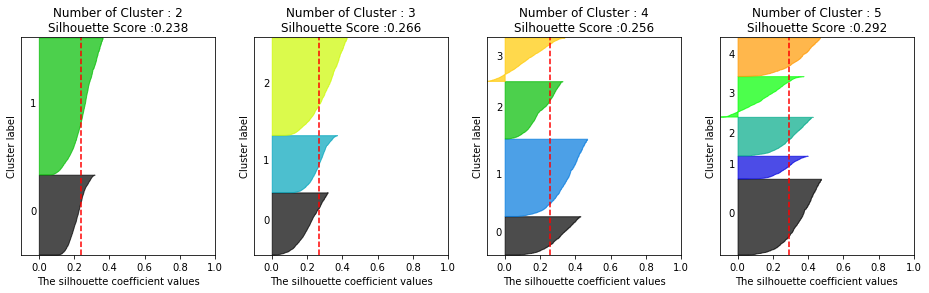

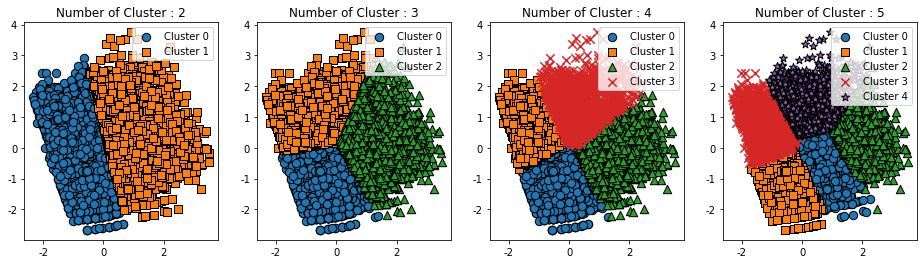

In [28]:
visualize_silhouette([2,3,4,5],f_scaled)
visualize_kmeans_plot_multi([2,3,4,5],f_scaled)

In [29]:
from sklearn.cluster import KMeans
labels=KMeans(n_clusters=5,random_state=0).fit_predict(f_scaled)
edf_merge2['labels']=labels
edf_merge2

,CUSTNO,FREQUENCY,TIME,CHANNEL,TRAITORS,MEMBERSHIP,labels
0,2,38,13,0,1,0,4
1,6,39,14,0,0,0,0
2,7,30,17,4,1,0,4
3,11,14,13,0,1,1,1
4,16,5,13,0,1,0,4
...,...,...,...,...,...,...,...
8466,19362,39,15,0,1,0,4
8467,19363,2,11,0,1,0,4
8468,19365,17,18,0,0,0,0
8469,19369,15,17,0,0,1,2


### 결과

In [30]:
# 빈도수만 가지고는 정확한 판단이 힘듬, PURCHAMOUNT가 필요
aggregations={'CUSTNO':'count',
              'FREQUENCY':'mean',
              'TIME':lambda x:x.mode()[0],
              'CHANNEL':'mean',
              'TRAITORS':'mean',
              'MEMBERSHIP':'mean'}
edf_merge_g=edf_merge2.groupby('labels').agg(aggregations)
edf_merge_g.sort_values(by='FREQUENCY',ascending=False)

,CUSTNO,FREQUENCY,TIME,CHANNEL,TRAITORS,MEMBERSHIP
labels,,,,,,
4,1501,23.802798,15,2.459694,1.000000,0.000000
1,892,22.502242,15,7.806054,1.000000,1.000000
0,2974,21.901479,15,0.531944,0.000000,0.000000
2,1518,20.797760,16,1.146904,0.000000,1.000000
3,1586,17.762295,17,25.725095,0.025221,0.449559


In [31]:
def get_a(label,a1,a2,a3,a4,a5):
    print('##### '+a1+' #####')
    print(np.sort(edf_merge2[edf_merge2['labels']==label][a1].unique()))
    print()
    print('##### '+a2+' #####')
    print(np.sort(edf_merge2[edf_merge2['labels']==label][a2].unique()))
    print()
    print('##### '+a3+' #####')
    print(np.sort(edf_merge2[edf_merge2['labels']==label][a3].unique()))
    print()
    print('##### '+a4+' #####')
    print(np.sort(edf_merge2[edf_merge2['labels']==label][a4].unique()))
    print()
    print('##### '+a5+' #####')
    print(np.sort(edf_merge2[edf_merge2['labels']==label][a5].unique()))
    print()
    fig,(ax1,ax2,ax3)=plt.subplots(figsize=(12,4),nrows=1,ncols=3)
    ax1.set_title(a1+' histogram')
    sns.histplot(edf_merge2[edf_merge2['labels']==label][a1],ax=ax1)
    ax2.set_title(a2+' histogram')
    sns.histplot(edf_merge2[edf_merge2['labels']==label][a2],ax=ax2)
    ax3.set_title(a3+' histogram')
    sns.histplot(edf_merge2[edf_merge2['labels']==label][a3],ax=ax3)

##### FREQUENCY #####
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  72  73
  74  75  78  79  81  82  84  92  96  99 105 126 131 139 143]

##### TIME #####
[10 11 12 13 14 15 16 17 18 19 20 21 22 23]

##### CHANNEL #####
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 31 32 33 35 36 37 38 43 47 49]

##### TRAITORS #####
[1]

##### MEMBERSHIP #####
[0]



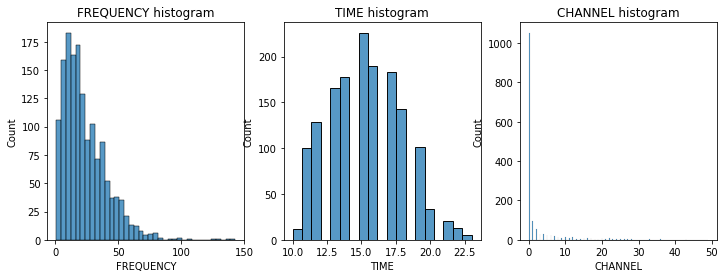

In [32]:
get_a(4,'FREQUENCY','TIME','CHANNEL','TRAITORS','MEMBERSHIP')

##### FREQUENCY #####
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  61  62  63  65  66  72  73  79  84  85 101 124 140 167]

##### TIME #####
[10 11 12 13 14 15 16 17 18 19 20 21 22 23]

##### CHANNEL #####
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  41  42  43  44  45  46  48  49  51  52  53  56  58  60
  61  66  68  73  77  79  87 116 122 124]

##### TRAITORS #####
[1]

##### MEMBERSHIP #####
[1]



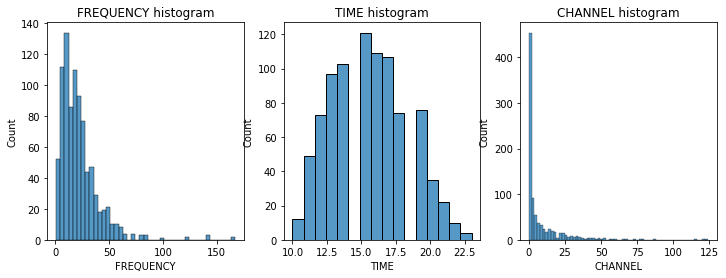

In [33]:
get_a(1,'FREQUENCY','TIME','CHANNEL','TRAITORS','MEMBERSHIP')

##### FREQUENCY #####
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  82  83  84  85  86  87  91  92  94  96
  99 102 103 106 109 111 112 124 125 132 145]

##### TIME #####
[10 11 12 13 14 15 16 17 18 19 20 21 22 23]

##### CHANNEL #####
[ 0  1  2  3  4  5  6  7  8  9 11]

##### TRAITORS #####
[0]

##### MEMBERSHIP #####
[0]



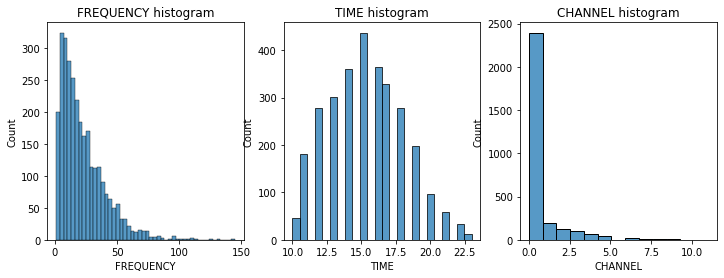

In [34]:
get_a(0,'FREQUENCY','TIME','CHANNEL','TRAITORS','MEMBERSHIP')

##### FREQUENCY #####
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  65  67  68  69  70  71  74  75  76
  77  79  80  81  82  84  89  91  92  93  96 109 110 120 132 139]

##### TIME #####
[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

##### CHANNEL #####
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14]

##### TRAITORS #####
[0]

##### MEMBERSHIP #####
[1]



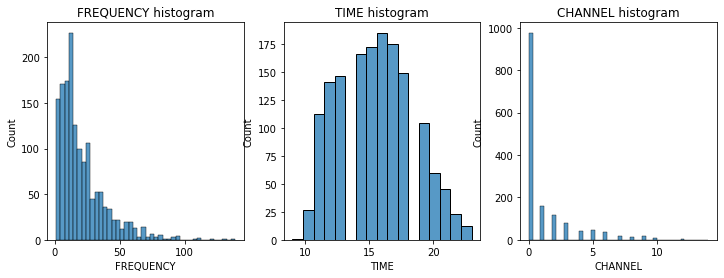

In [35]:
get_a(2,'FREQUENCY','TIME','CHANNEL','TRAITORS','MEMBERSHIP')

##### FREQUENCY #####
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  61  62  64  65  67  68  70  72  78  79  81  83  84
 100 106 108 113 119]

##### TIME #####
[10 11 12 13 14 15 16 17 18 19 20 21 22 23]

##### CHANNEL #####
[  3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  80  82  83  84  85  86  89  91  93  97  98  99 109 118 120 121 137
 142 143 165]

##### TRAITORS #####
[0 1]

##### MEMBERSHIP #####
[0 1]



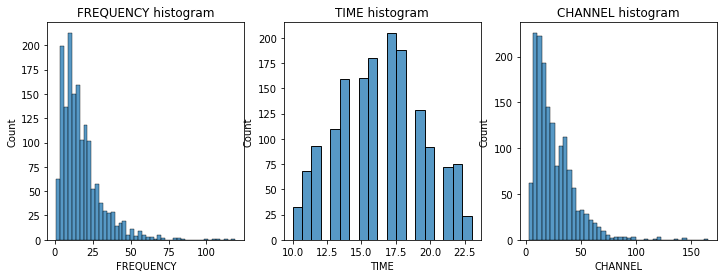

In [36]:
get_a(3,'FREQUENCY','TIME','CHANNEL','TRAITORS','MEMBERSHIP')